In [22]:
# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Usando uma base de dados real do Kaggle
!pip install -q kagglehub

import kagglehub

# Baixa um dataset do Kaggle: https://www.kaggle.com/datasets/selener/consumer-complaint-database
path = kagglehub.dataset_download('selener/consumer-complaint-database')

import os

entries = os.listdir(path)
# Arquivos baixados
for entry in entries:
    print(entry)


[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
rows.csv


/tmp/ipykernel_22/1133837438.py:3: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + '/rows.csv')


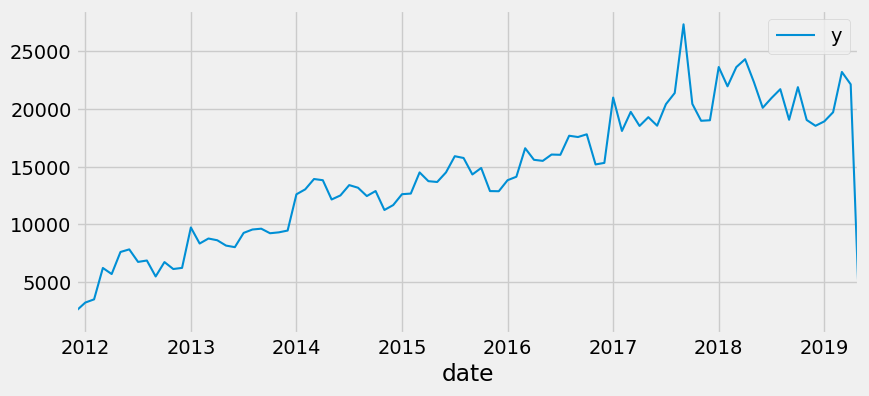

In [26]:
import pandas as pd
#Ler o Arquivo CSV
data = pd.read_csv(path + '/rows.csv')

#Converter a coluna 'Date received' para formato de data
data['Date received'] = pd.to_datetime(data['Date received'])

#Criar uma nova coluna com o ano e mês
data['date'] = data['Date received'].dt.to_period('M')

#Agrupar por produto e mês, contando o número de tickets e criando um novo dataFrame
data = data.groupby(['date']).size().reset_index(name='totalTickets')
data = data.set_index('date')

#Ordenar os resultados
data = data.sort_values('date')

# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4))
data['totalTickets'].plot(ax=ax, label='y')
ax.legend();